In [82]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
np.random.seed(1000)
y=np.random.standard_normal(20)

In [99]:
np.random.seed(2000)
y=np.random.standard_normal((20,2)).cumsum(axis=0)

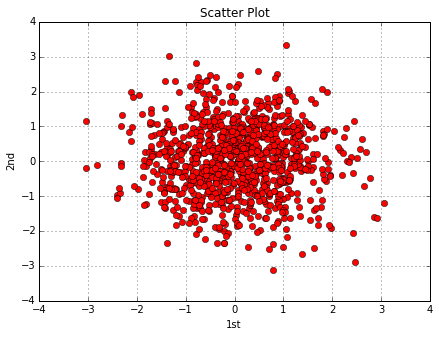

In [109]:
y = np.random.standard_normal((1000, 2))

plt.figure(figsize=(7, 5))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.grid(True)
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')

In [118]:
import matplotlib.finance as mpf

start = (2014,5,1)
end = (2014,6,30)

quotes = mpf.quotes_historical_yahoo_ochl('^GDAXI', start, end)

In [119]:
quotes[:2]

[(735355.0,
  9611.7900389999995,
  9556.0195309999999,
  9627.3798829999996,
  9533.2998050000006,
  88062300.0),
 (735358.0,
  9536.3798829999996,
  9529.5,
  9548.1699219999991,
  9407.0898440000001,
  61911600.0)]

In [61]:
print(type(pydt))

<class 'datetime.datetime'>


In [14]:
sp500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3592 entries, 2000-01-03 to 2014-04-14
Data columns (total 6 columns):
Open         3592 non-null float64
High         3592 non-null float64
Low          3592 non-null float64
Close        3592 non-null float64
Volume       3592 non-null int64
Adj Close    3592 non-null float64
dtypes: float64(5), int64(1)
memory usage: 196.4 KB


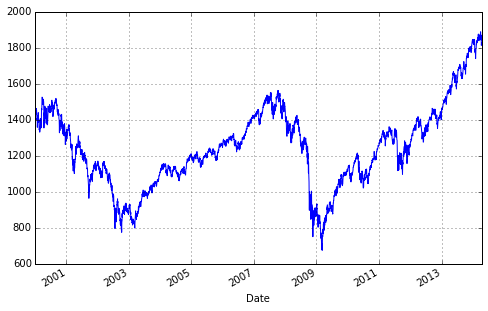

In [19]:
%matplotlib inline
sp500['Close'].plot(grid=True, figsize=(8,5))

In [20]:
sp500['42d'] = np.round(pd.rolling_mean(sp500['Close'], window=42),2)
sp500['252d'] = np.round(pd.rolling_mean(sp500['Close'], window=252),2)

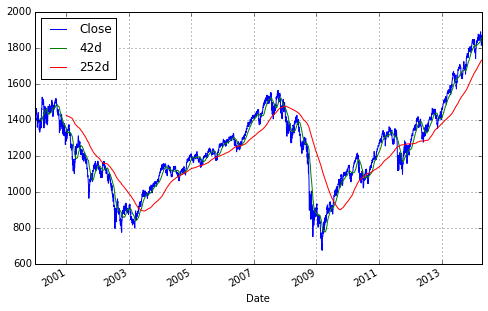

In [24]:
sp500[['Close','42d','252d']].plot(grid=True, figsize=(8,5))

In [25]:
sp500['42-252'] = sp500['42d']-sp500['252d']
sp500['42-252'].tail()

Date
2014-04-08    125.22
2014-04-09    125.88
2014-04-10    125.72
2014-04-11    124.72
2014-04-14    123.89
Name: 42-252, dtype: float64

In [26]:
SD = 50
sp500['Regime'] = np.where(sp500['42-252']>SD,1,0)
sp500['Regime'] = np.where(sp500['42-252']<-SD, -1, sp500['Regime'])
sp500['Regime'].value_counts()

 1    1489
 0    1232
-1     871
dtype: int64

NameError: name 'plt' is not defined

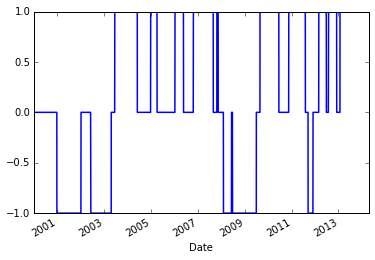

In [27]:
sp500['Regime'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

In [29]:
sp500['Market']=np.log(sp500['Close']/sp500['Close'].shift(1))
sp500['Strategy']=sp500['Regime'].shift(1)*sp500['Market']

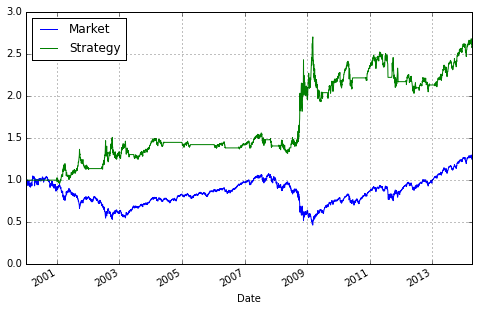

In [30]:
sp500[['Market','Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(8,5))

In [42]:
c=0.35
c.as_integer_ratio()

(3152519739159347, 9007199254740992)

In [ ]:
import opportunity_constructs.utilities as ocu
aligned_output = ocu.get_aligned_futures_data(contract_list=['NGU2016','NGX2016','NGF2017'],aggregation_method=12,contracts_back=10,date_to=20160218)
#aligned_output = ocu.get_aligned_futures_data(contract_list=['HOV2007','HOX2007'],aggregation_method=12,contracts_back=10,date_to=20070420)
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']
#bf_price = aligned_data['c1']['close_price']-aligned_data['c2']['close_price']
#bf_price_recent = bf_price[1:]
#aligned_data_recent = aligned_data[1:]
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [1]:
import QuantLib as ql
import matplotlib.pyplot as plt
%matplotlib inline




In [3]:
# option data

maturity_date = ql.Date(15,1,2016)
spot_price = 127.62
strike_price = 130
volatility = 0.2
dividend_rate = 0.0163
option_type = ql.Option.Call

risk_free_rate = 0.001
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(8,5,2015)
ql.Settings.instance().evaluationDate = calculation_date

In [4]:
# construct the European Option

payoff = ql.PlainVanillaPayoff(option_type, strike_price)
exercise = ql.EuropeanExercise(maturity_date)
european_option = ql.VanillaOption(payoff, exercise)

In [5]:
spot_handle = ql.QuoteHandle(
    ql.SimpleQuote(spot_price)
)
flat_ts = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, risk_free_rate, day_count)
)
dividend_yield = ql.YieldTermStructureHandle(
    ql.FlatForward(calculation_date, dividend_rate, day_count)
)
flat_vol_ts = ql.BlackVolTermStructureHandle(
    ql.BlackConstantVol(calculation_date, calendar, volatility, day_count)
)
bsm_process = ql.BlackScholesMertonProcess(spot_handle, 
                                           dividend_yield, 
                                           flat_ts, 
                                           flat_vol_ts)

In [7]:
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))
bs_price = european_option.NPV()
print(bs_price)

e

6.749271812460607


In [7]:
exercise = ql.AmericanExercise(maturity_date)

In [9]:
import QuantLib as ql
import math as m
calendar = ql.UnitedStates()
day_count = ql.ActualActual()

interest_rate = 0.00105
calc_date = ql.Date(1,12,2015)
yield_curve = ql.FlatForward(calc_date,interest_rate,day_count,
                             ql.Compounded,ql.Continuous)


In [1]:
import my_sql_routines.options_price_loader as opl
#wuhu = opl.update_options_price_database_from_cme_files_4ticker(ticker='ESZ2016',settle_date=20160302)
opl.update_options_price_database_from_cme_files(settle_date=20160303)
#expiration_date = wuhu['expiration_date']
#settle_datetime = wuhu['settle_datetime']

#expiration_date.date()-settle_datetime.date()



LNG2017
LNG2018
LNJ2016
LNJ2017
LNK2016
LNK2017
LNM2016
LNM2017
LNN2016
LNN2017
LNQ2016
LNQ2017
LNV2016
LNV2017
LNZ2016
LNZ2017
LCF2017
LCF2018
LCG2017
LCG2018
LCH2016
LCH2017
LCJ2016
LCJ2017
LCK2016
LCK2017
LCM2016
LCM2017
LCN2016
LCN2017
LCQ2016
LCQ2017
LCU2016
LCU2017
LCV2016
LCV2017
LCX2016
LCX2017
LCZ2016
LCZ2017
ESF2017
ESG2017
ESH2016
ESJ2016
ESK2016
ESM2016
ESN2016
ESQ2016
ESU2016
ESV2016
ESX2016
ESZ2016
ECF2017
ECF2018
ECG2017
ECG2018
ECH2016
ECH2017
ECJ2016
ECJ2017
ECK2016
ECK2017
ECM2016
ECM2017
ECN2016
ECN2017
ECQ2016
ECQ2017
ECU2016
ECU2017
ECV2016
ECV2017
ECX2016
ECX2017
ECZ2016
ECZ2017
JYF2017
JYF2018
JYG2017
JYG2018
JYH2016
JYH2017
JYJ2016
JYJ2017
JYK2016
JYK2017
JYM2016
JYM2017
JYN2016
JYN2017
JYQ2016
JYQ2017
JYU2016
JYU2017
JYV2016
JYV2017
JYX2016
JYX2017
JYZ2016
JYZ2017
ADF2017
ADF2018
ADG2017
ADG2018
ADH2016
ADH2017
ADJ2016
ADJ2017
ADK2016
ADK2017
ADM2016
ADM2017
ADN2016
ADN2017
ADQ2016
ADQ2017
ADU2016
ADU2017
ADV2016
ADV2017
ADX2016
ADX2017
ADZ2016
ADZ2017
CDF2017


In [1]:
import read_exchange_files.process_cme_options as pco
selected_frame = pco.process_cme_options_4ticker(ticker='CDF2017',report_date=20160303)
ticker='ECF2017'
#selected_frame[(selected_frame['ticker'] == ticker)&(selected_frame['option_type'] == 'C')]
selected_frame

,asset_type,maturity_string,option_type,ticker_head,ticker_year,ticker_month,ticker


In [5]:
import os.path
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160226, ext='raw_options_data')
options_data_dir
file_name='commodity'

os.path.isfile(options_data_dir + '/' + file_name + '_formatted_.pkl')

options_data_dir + '/' + file_name + '_formatted_.pkl'

'C:\\Research/data/options_data_raw/2016/201602/20160226/commodity_formatted_.pkl'

In [22]:
my_list = ['A', 'B', 'C']

my_list[1:2]


['B']

In [22]:
import opportunity_constructs.spread_carry as sc

#spread_carry_output = sc.generate_spread_carry_sheet_4date(report_date=20160317)
#spread_report = spread_carry_output['spread_report']
#ticker_head_list = list(spread_report['tickerHead'].unique())
# Compare BO and S sizing

spread_report[spread_report['tickerHead']==ticker_head_list[19]]
#spread_report[spread_report['tickerHead']=='CC']

,ticker1,ticker2,tickerHead,front_tr_dte,carry,q_carry,reward_risk,price,q,upside,downside,change5,change10,change20
0,EDJ2016,EDK2016,ED,21,NaN,NaN,NaN,0.045,88,41.78,-53.12,NaN,NaN,NaN
1,EDK2016,EDM2016,ED,41,-12.5,-2,-0.07,0.050,90,43.75,-43.75,NaN,NaN,NaN
2,EDM2016,EDN2016,ED,60,37.5,21,0.32,0.035,69,31.25,-31.25,NaN,NaN,NaN
3,EDN2016,EDQ2016,ED,84,37.5,14,0.13,0.020,55,31.25,-62.50,NaN,NaN,NaN
4,EDQ2016,EDU2016,ED,104,-12.5,-5,-0.05,0.025,60,62.50,-31.25,NaN,NaN,NaN
5,EDU2016,EDZ2016,ED,128,-150.0,8,-0.50,0.085,52,62.50,-70.75,NaN,NaN,NaN
6,EDZ2016,EDH2017,ED,192,50.0,14,0.05,0.065,38,75.00,-81.25,NaN,NaN,NaN
7,EDH2017,EDM2017,ED,250,-25.0,6,-0.02,0.075,32,87.50,-100.00,NaN,NaN,NaN
8,EDM2017,EDU2017,ED,318,0.0,6,0.00,0.075,26,81.25,-87.50,NaN,NaN,NaN
9,EDU2017,EDZ2017,ED,381,-25.0,1,-0.02,0.085,25,81.25,-87.50,NaN,NaN,NaN


In [36]:
S0=100
K=105
T=1
r=0.05
sigma = 0.2

from numpy import *
I=100000

z=random.standard_normal(I)
ST = S0 * exp((r - 0.5 * sigma ** 2) * T + sigma * sqrt(T) * z)
hT = maximum(ST - K, 0)
C0 = exp(-r * T) * sum(hT) / I

print("Value of the European Call Option %5.3f",C0)

Value of the European Call Option %5.3f 8.00966995244


In [23]:
ticker_head_list = ['ED', 'C', 'S', 'SM', 'BO', 'W', 'KW', 'LC', 'LN', 'FC',
                        'ES', 'NQ', 'AD', 'CD', 'EC', 'JY', 'BP',
                        'FV', 'TU', 'TY', 'US', 'GC', 'SI', 'CL', 'NG', 'HO', 'RB']

import contract_utilities.contract_meta_info as cmi
new_list = cmi.cme_futures_tickerhead_list

set(ticker_head_list)-set(new_list)

set()

In [ ]:
import read_exchange_files.process_cme_futures as pcf
import read_exchange_files.read_cme_files as rcf
cme_output = pcf.process_cme_futures_4tickerhead(ticker_head='RB', report_date=20160225)
#data_read_out = rcf.read_cme_future_settle_csv_files(file_name='nymex_futures', report_date=20160224)
#title_frame = data_read_out['title_frame']
#title_frame
#title_frame[title_frame['ticker_head']=='LN']

#data_read_out[data_read_out['ticker_head']=='CL']

#data_read_out['month_strike_list'][68]
cme_output['settle_frame']

In [ ]:
import get_price.get_futures_price as gfp
import shared.calendar_utilities as cu
import contract_utilities.expiration as exp
price_frame = gfp.get_futures_price_preloaded(ticker_head='ED',settle_date=20160225)
price_frame.sort('tr_dte',ascending=True,inplace=True)


exp_date = 20170225


exp_datetime = cu.convert_doubledate_2datetime(exp_date)

price_frame['exp_date'] = [exp.get_futures_expiration(x) for x in price_frame['ticker']]
price_frame = price_frame[price_frame['exp_date']<exp_datetime]

price_frame['implied_rate'] = 100-price_frame['close_price']

price_frame[['implied_rate','exp_date','cal_dte']]


In [ ]:
[1+(price_frame['implied_rate'].iloc[x]*(price_frame['cal_dte'].iloc[x+1]-price_frame['cal_dte'].iloc[x])/36500) for x in range(len(price_frame.index)-1)]

1+(price_frame['implied_rate'].iloc[0]*price_frame['cal_dte'].iloc[0]/365000)


1+((price_frame['implied_rate'].iloc[-1]*((exp_datetime-price_frame['exp_date'].iloc[-1].to_datetime()).days))/365000)


In [6]:
import interest_curve.get_rate_from_stir as grfs
wuhu = grfs.get_simple_rate(as_of_date=20160216,date_to=20160718)

print(wuhu['rate_output'])

wuhu['price_frame']



0.00648406165771


,ticker,cal_dte,exp_date,implied_rate
126,EDG2016,-1,2016-02-15,0.6182
2500,EDH2016,27,2016-03-14,0.6375
82,EDJ2016,62,2016-04-18,0.6550
61,EDK2016,90,2016-05-16,0.6600
2432,EDM2016,118,2016-06-13,0.6650
20,EDN2016,153,2016-07-18,0.6750
1,EDQ2016,181,2016-08-15,0.6850
2369,EDU2016,216,2016-09-19,0.7000
2305,EDZ2016,307,2016-12-19,0.7500
2244,EDH2017,391,2017-03-13,0.7950


In [3]:
import numpy as np
print(wuhu['middle_discount'])

print(wuhu['total_discount'])

print(wuhu['first_rate'])
print(wuhu['first_period'])

print(wuhu['last_rate'])
print(wuhu['last_period'])

print(wuhu['total_period'])

print(np.prod(np.array(wuhu['middle_discount'])))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500)))
print((1+(wuhu['last_rate']*wuhu['last_period']/36500)))


print((1+(wuhu['first_rate']*wuhu['first_period']/36500))*
      (1+(wuhu['last_rate']*wuhu['last_period']/36500))*
     np.prod(np.array(wuhu['middle_discount'])))

KeyError: 'middle_discount'

In [1]:
import get_price.presave_price as pp
pp.generate_and_update_futures_data_files(ticker_head_list='cme_futures')
#data_out = pp.generate_and_update_futures_data_file_4tickerhead(ticker_head='B')
#data_out[data_out['ticker']=='BZ2016']

In [ ]:

import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
import futures_charts.futures_curve as fc
bf_signals_output = fc.get_butterfly_scatter_plot(report_date=report_date,id=195)

In [ ]:
aligned_output = bf_signals_output['aligned_output']
aligned_data = aligned_output['aligned_data']
bf_price = aligned_data['c1']['close_price']+aligned_data['c3']['close_price']-2*aligned_data['c2']['close_price']

In [ ]:
import matplotlib.pyplot as plt
plt.plot(bf_price)
plt.grid()         
         
plt.show()

In [ ]:
bad_data = aligned_data[bf_price<-0.004]   #<-0.03
bad_data

# HOV2007,HOX2007, HOZ2007 20070213 to 20070413

In [ ]:
aligned_data.iloc[1047]

In [ ]:
import shared.directory_names as dn
options_data_dir = dn.get_dated_directory_extension(folder_date=20160208,ext='comex_options_csv_address')
options_data_dir

In [ ]:
import contract_utilities.expiration as exp
report_date = exp.doubledate_shift_bus_days()
report_date

In [ ]:
import scheduled_jobs.options_data_load_job as odlj
import shared.downloads as sd
sd.download_csv_from_web(web_address=odlj.comex_options_csv_address)


In [ ]:
import scheduled_jobs.options_data_load_job

In [ ]:
with open(r'C:\Research\data\options_data_raw\2016\201602\20160208\interest_rate.pkl','rb') as handle:
    wuhu = pickle.load(handle)

In [ ]:
scatter_matrix = np.zeros((3,3))

for i in range(all_samples.shape[1]):
    scatter_matrix +=(all_samples[:,i].reshape(3,1)).dot(
    (all_samples[:,i].reshape(3,1)-mean_vector).T)
print('Scatter Matrix\n',scatter_matrix)    

In [ ]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

In [ ]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),
                                         eig_val_sc[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)

In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."
transformed
matrix_w

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merged_dataframe.index,(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-
         merged_dataframe['BOK2016']['close_price'])
         
         
plt.show()

In [ ]:
(merged_dataframe['BOH2016']['close_price']+merged_dataframe['BON2016']['close_price'])/2-merged_dataframe['BOK2016']['close_price']

In [ ]:


import matplotlib.pyplot as plt
plt.plot(range(len(aligned_dataframe.index)),aligned_dataframe['c1']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c2']['tr_dte'],
         range(len(aligned_dataframe.index)),aligned_dataframe['c3']['tr_dte'])
plt.grid()         
         
plt.show()

    

    

In [ ]:
merged_dataframe['c1']['tr_dte'].isnull().sum()
merged_dataframe['c3']['tr_dte'].isnull().sum()

In [ ]:
futures_dataframe

In [ ]:
print(trDte1)
print(trDte2)
print(trDte3)

In [ ]:
bf_price = (aligned_dataframe['c1']['close_price']+aligned_dataframe['c3']['close_price'])/2-aligned_dataframe['c2']['close_price']

In [ ]:
plt.plot(range(len(aligned_dataframe.index)),bf_price)
plt.grid()         
         
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(price_ratio)
plt.grid()
plt.show()

In [ ]:
import numpy as np
nan_matrix = np.empty((2,2))
nan_matrix[:] = np.NAN
nan_matrix